# Ch01_XOR을 위한 신경망

* 사용할 패키지 불러오기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

print(tf.__version__)

2.0.0-alpha0


* 시드값 고정

In [2]:
tf.random.set_seed(777)

* 사용할 데이터 가져오기

In [3]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

* 데이터 배열

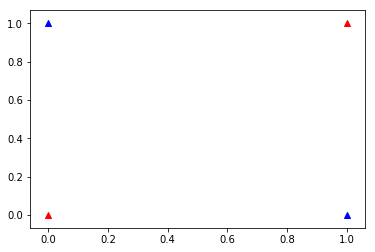

In [4]:
plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

* 각 축에 이름 새기기

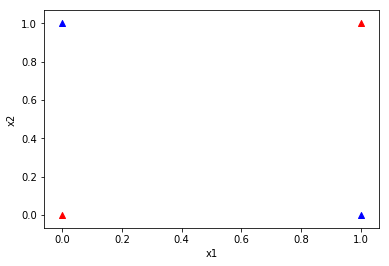

In [5]:
plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 모델링 시작

* 데이터셋 설정

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

* 데이터 값을 실수로 전환

In [7]:
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

### 1) Logistic Regression 활용해 XOR 해결

[![1.png](https://i.postimg.cc/hjwWVt3r/1.png)](https://postimg.cc/gXvTWmpX)

* Weight, bias 초기값 세팅

In [8]:
W = tf.Variable(tf.zeros((2, 1)), name = 'weight')
b = tf.Variable(tf.zeros((1, )), name = 'bias')

* Sigmoid 함수 설정

In [9]:
def logistic_regression(features):
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

* Cost 함수 설정
$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [10]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(-labels *tf.math.log(hypothesis) - (1- labels) * tf.math.log(1 - hypothesis))
    return cost

* Optimizer 설정

In [11]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

* Sigmoid를 통해 0.5를 기준으로 y값을 0, 1 중 선택

In [12]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.float32)) # predicted와 labels이 동일하면 1, 아니면 0
    return accuracy

* GradientTape으로 경사값 구하기

In [17]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features), features, labels)
    return tape.gradient(loss_value, [W, b])

* Session 실행

In [18]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, [W, b]))
        
        if step % 100 ==0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]


In [19]:
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Testset Accuracy: 0.5000


## 2) Neural Net 활용해 XOR 해결

[![2.png](https://i.postimg.cc/fWGkNzTm/2.png)](https://postimg.cc/K45m7yT8)

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [21]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [22]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [23]:
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))

Iter: 0, Loss: 0.8487
Iter: 5000, Loss: 0.6847
Iter: 10000, Loss: 0.6610
Iter: 15000, Loss: 0.6154
Iter: 20000, Loss: 0.5722
Iter: 25000, Loss: 0.5433
Iter: 30000, Loss: 0.5211
Iter: 35000, Loss: 0.4911
Iter: 40000, Loss: 0.4416
Iter: 45000, Loss: 0.3313


In [24]:
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Testset Accuracy: 1.0000


## 3) 모델링(Class 생성)

In [8]:
nb_classes = 10

In [10]:
class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()        
     
        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')
        
        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
        
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
        
    def deep_nn(self, features):
        layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost

    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    def fit(self, dataset, EPOCHS=20000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))
                    
    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

* DNN을 통한 XOR 문제 해결

In [11]:
model = wide_deep_nn(nb_classes)

In [12]:
model.fit(dataset)

Iter: 0, Loss: 1.0398
Iter: 500, Loss: 0.6936
Iter: 1000, Loss: 0.6923
Iter: 1500, Loss: 0.6912
Iter: 2000, Loss: 0.6901
Iter: 2500, Loss: 0.6890
Iter: 3000, Loss: 0.6879
Iter: 3500, Loss: 0.6867
Iter: 4000, Loss: 0.6855
Iter: 4500, Loss: 0.6842
Iter: 5000, Loss: 0.6827
Iter: 5500, Loss: 0.6811
Iter: 6000, Loss: 0.6793
Iter: 6500, Loss: 0.6772
Iter: 7000, Loss: 0.6749
Iter: 7500, Loss: 0.6721
Iter: 8000, Loss: 0.6690
Iter: 8500, Loss: 0.6653
Iter: 9000, Loss: 0.6610
Iter: 9500, Loss: 0.6560
Iter: 10000, Loss: 0.6501
Iter: 10500, Loss: 0.6431
Iter: 11000, Loss: 0.6348
Iter: 11500, Loss: 0.6249
Iter: 12000, Loss: 0.6131
Iter: 12500, Loss: 0.5989
Iter: 13000, Loss: 0.5817
Iter: 13500, Loss: 0.5607
Iter: 14000, Loss: 0.5351
Iter: 14500, Loss: 0.5039
Iter: 15000, Loss: 0.4667
Iter: 15500, Loss: 0.4237
Iter: 16000, Loss: 0.3762
Iter: 16500, Loss: 0.3268
Iter: 17000, Loss: 0.2787
Iter: 17500, Loss: 0.2345
Iter: 18000, Loss: 0.1962
Iter: 18500, Loss: 0.1642
Iter: 19000, Loss: 0.1380
Iter: 1950

* Test 데이터의 값은

In [13]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000
